In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

In [2]:
# Get the data for H1 from the LOSC site
!wget https://losc.ligo.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
!wget https://losc.ligo.org/s/events/GW170104/L-L1_LOSC_4_V1-1167559920-32.gwf

--2020-06-27 14:34:34--  https://losc.ligo.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
Resolving losc.ligo.org (losc.ligo.org)... 131.215.113.73
Connecting to losc.ligo.org (losc.ligo.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf [following]
--2020-06-27 14:34:35--  https://www.gw-openscience.org/s/events/GW170104/H-H1_LOSC_4_V1-1167559920-32.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1024018 (1000K)
Saving to: ‘H-H1_LOSC_4_V1-1167559920-32.gwf’

H-H1_LOSC_4_V1-1167 100%[===================>]   1000K   596KB/s    in 1.7s    

2020-06-27 14:34:37 (596 KB/s) - ‘H-H1_LOSC_4_V1-1167559920-32.gwf’ saved [1024018/1024018]

--2020-06-27 14:34:37--  https://losc.lig

### See the track of GW170104 in both the Hanford and Livingston data ###

<Figure size 432x288 with 0 Axes>

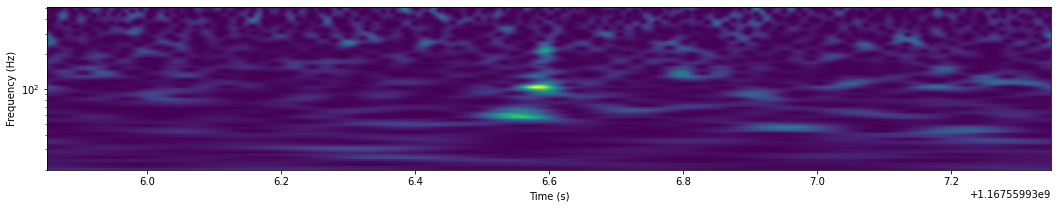

<Figure size 432x288 with 0 Axes>

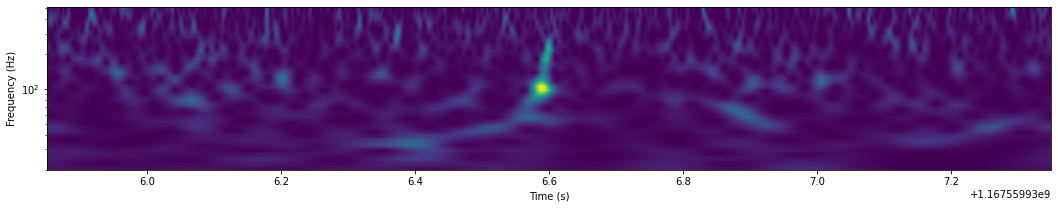

In [3]:
%matplotlib inline

from pycbc.catalog import Merger
import pylab

for ifo in ['H1', 'L1']:
    pylab.figure()
    ts = Merger("GW170104").strain(ifo)

    ts = ts.whiten(4, 4)
    zoom = ts.time_slice(1167559936.6 - .75, 1167559936.6 + .75)
    times, freqs, power = zoom.qtransform(.001, 1, frange=(20, 512), qrange=(4, 64))

    pylab.figure(figsize=(18, 3))
    pylab.pcolormesh(times, freqs, power)
    
    pylab.ylim(20, 512)
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(times.min(), times.max())
    pylab.yscale('log')